In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.interactive import *

INFO     2016-09-12 15:11:55,135 - kid_readout.<module>:13  kid_readout logging setup with default stream handler


In [3]:
from kid_readout.roach.tests.mock_valon import MockValon
from kid_readout.roach import tools
from kid_readout.roach import demodulator

In [17]:
ri = Roach2Heterodyne(roachip=ROACH2_IP, adc_valon=ROACH2_VALON, host_ip=ROACH2_GBE_HOST_IP,
                                  lo_valon=MockValon(), initialize=False)
ri.initialize(use_config=False)
ri.set_loopback(True)
ri.set_fft_gain(0)

INFO     2016-09-12 15:17:14,303 - kid_readout.roach.interface.initialize:464  Reinitializing system
INFO     2016-09-12 15:17:14,437 - kid_readout.roach.interface.initialize:471  Programming r2iq2xpfb14mcr18gb_2016_Jun_30_1104.bof
INFO     2016-09-12 15:17:15,016 - kid_readout.roach.interface.set_fft_gain:307  Set FFT gain integer to 4.
INFO     2016-09-12 15:17:17,031 - kid_readout.roach.interface.initialize:488  Requested sampling rate 512.0 MHz. Estimated sampling rate 513.0 MHz
INFO     2016-09-12 15:17:20,245 - kid_readout.roach.r2heterodyne.initialize:72  Succesfully recalibrated QDR
INFO     2016-09-12 15:17:20,332 - kid_readout.roach.interface.set_fft_gain:307  Set FFT gain integer to 0.


In [16]:
ri.host_ip

'192.168.1.1'

In [18]:
from kid_readout.roach import r2_udp_catcher

In [13]:
!netstat -u -l -n

Active Internet connections (only servers)
Proto Recv-Q Send-Q Local Address               Foreign Address             State      
udp        0      0 0.0.0.0:54499               0.0.0.0:*                               
udp        0      0 0.0.0.0:875                 0.0.0.0:*                               
udp        0      0 0.0.0.0:877                 0.0.0.0:*                               
udp        0      0 0.0.0.0:111                 0.0.0.0:*                               
udp        0      0 0.0.0.0:33648               0.0.0.0:*                               
udp        0      0 0.0.0.0:631                 0.0.0.0:*                               
udp        0      0 10.0.0.1:123                0.0.0.0:*                               
udp        0      0 192.168.0.101:123           0.0.0.0:*                               
udp        0      0 192.168.1.1:123             0.0.0.0:*                               
udp        0      0 127.0.0.1:123               0.0.0.0:*           

In [9]:
ROACH2_GBE_HOST_IP

'10.0.0.1'

In [37]:
nchan = 512
nsamp = 2**16
phases = tools.preset_phases(nchan)
phases[1] = 0.0
freqs = np.linspace(12.123, 252.3123,num=nchan)
ri.set_tone_baseband_freqs(freqs,nsamp=nsamp, phases=phases)
ri.select_fft_bins(range(nchan))
ri.phase0=None
packets = r2_udp_catcher.get_udp_packets(ri,2**14)
#gold_data,_ = ri.get_data(ri.blocks_per_second,demod=True)
#raw_data,raw_seqno = ri.get_data(ri.blocks_per_second,demod=False)
#stream_demod = demodulator.get_stream_demodulator_from_roach_state(ri.state,ri.active_state_arrays)
#demod_data = stream_demod.demodulate_stream(raw_data,raw_seqno-ri.phase0)

In [38]:
len(packets)

16385

In [46]:
np.fromstring(packets[2][-4:],dtype='u4')-np.fromstring(packets[1][-4:],dtype='u4')

array([16384], dtype=uint32)

In [44]:
2**28/2**15

8192

In [172]:
x = np.arange(16).reshape(2,8)

In [173]:
x.shape

(2, 8)

In [174]:
from numpy.lib import stride_tricks

In [176]:
b = np.zeros(100)

In [190]:
x = np.outer(np.arange(2),np.arange(8,32,8))
x.shape = (np.prod(x.shape),)

In [192]:
x.shape

(6,)

In [193]:
x.strides

(8,)

In [194]:
a= np.ones((8,))
b = np.arange(8)

In [195]:
x = np.multiply(a,b,out=a)

In [199]:
np.multiply?

In [196]:
a

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.])

In [197]:
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.])

In [198]:
a is x

True

In [185]:
np.broadcast_arrays(x[None,:,:],b[:,None,None])[0].strides

(0, 64, 8)

In [187]:
stride_tricks.as_strided(x,(100,2,8),(0,64,8)).shape

(100, 2, 8)

In [47]:
!mkdir /data/readout/testing

In [48]:
np.savez('/data/readout/testing/r2_packet_data.npz',packets=packets,state=ri.state,state_arrays=ri.active_state_arrays)

In [260]:
pdata = np.load('/data/readout/testing/r2_packet_data.npz')

In [267]:
len(pdata['packets'])

16385

In [50]:
!ls -lhtr /data/readout/testing/

total 65M
-rwxrwxr-x. 1 readout readout 65M Sep 12 15:50 r2_packet_data.npz


In [294]:
reload(demodulator)

<module 'kid_readout.roach.demodulator' from '/home/gjones/kid_readout/kid_readout/roach/demodulator.py'>

In [298]:
ri.state.reference_sequence_number=0

In [300]:
ri.state

StateDict({'boffile': 'r2iq2xpfb14mcr18gb_2016_Jun_30_1104.bof', 'modulation_output': 0, 'modulation_rate': 0, 'fft_shift_register': 1048512, 'num_tone_samples': 65536, 'bank': 0, 'num_filterbank_channels': 16384, 'loopback': True, 'lo_frequency': 0.0, 'adc_sample_rate': 512000000.0, 'waveform_normalization': 0.001068115234375, 'hardware_delay_samples': -16025.6, 'num_tones': 512, 'debug_register': 0, 'dac_attenuation': nan, 'heterodyne': True})

In [302]:
state = ri.state
state.reference_sequence_number=0
sd = demodulator.get_stream_demodulator_from_roach_state(state,ri.active_state_arrays)

In [270]:
sn,ob = sd.decode_and_demodulate_packets(pdata['packets'],assume_not_contiguous=True)

In [249]:
snd = np.diff(sn)

In [252]:
snd[:10]

array([16384, 16384, 16384, 32768, 16384, 16384, 16384, 16384, 16384, 16384], dtype=uint32)

In [253]:
snd[snd!=sd.sequence_number_increment_per_packet]//16384

array([2], dtype=uint32)

In [248]:
(np.diff(sn)).sum()

268435456

In [303]:
fake_data = np.ones((16384,1025),dtype=np.complex64).view(np.float32).astype(np.int16)
fake_data.view(np.uint32)[:,-1] = np.arange(fake_data.shape[0],dtype=np.uint32)*16384
fake_data = fake_data.view('uint8')

In [304]:
sn,noncontig = sd.decode_and_demodulate_packets(fake_data,assume_not_contiguous=True)

In [305]:
sn,contig = sd.decode_and_demodulate_packets(fake_data,assume_not_contiguous=False)

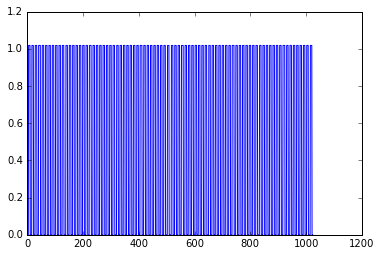

In [309]:
plot(noncontig.std(0))

In [ ]:
coefscipy.signal.firwin(num_taps+1,0.5,window=window_param).astype(coeff_dtype)

In [728]:
from kid_readout.analysis.timeseries import decimating_fir
reload(decimating_fir)

<module 'kid_readout.analysis.timeseries.decimating_fir' from '/home/gjones/kid_readout/kid_readout/analysis/timeseries/decimating_fir.pyc'>

In [753]:
mshb = decimating_fir.MultistageHalfBandDecimationFilter(np.ones((1,),dtype='int')*64)#,window_param=('chebwin',80))

In [754]:
ind = np.random.randn(2**20)

In [755]:
ppn = mshb.polyphase(ind)

In [756]:
naive = mshb.naive(ind,decimate=True)

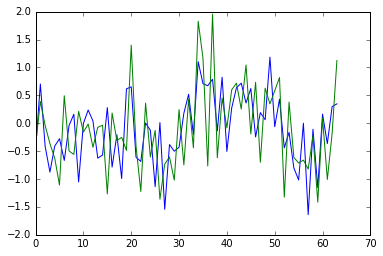

In [757]:
plot(ppn[-64:])
plot(naive[-64:])

In [758]:
c1 = scipy.signal.chirp(np.arange(2**22),0,2**22,1/2.)

In [764]:
pp = mshb.naive(c1)

In [765]:
pp.shape

(2097152,)

(0, 2000)

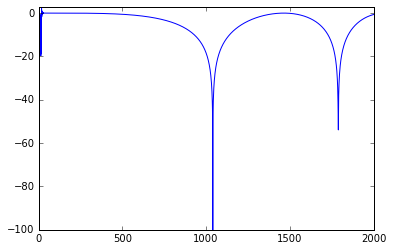

In [766]:
plot(20*np.log10(np.abs(pp)))
ylim(-100,3)
xlim(0,2000)

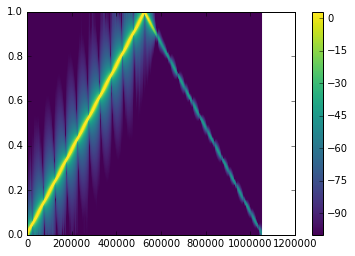

In [768]:
_= specgram(pp,cmap=cm.viridis)
colorbar()
clim(-100,3)
#xlim(0,5000)

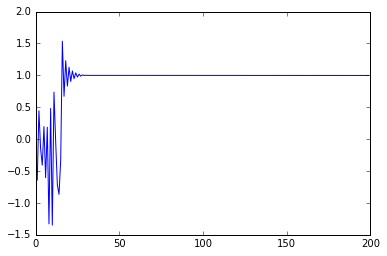

In [763]:
plot(pp[:200])

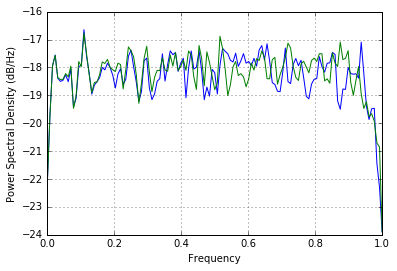

In [752]:
_= psd(ppn)
_=psd(naive)#,Fs=4)

In [738]:
f0 = mshb.filters[0]

In [739]:
f0._polyphase_component_even._history=None
delayr = f0._polyphase_component_even.apply(ind)
pph = decimating_fir.FIR1D(f0.coeff[::2]).apply(ind)

In [740]:
f0.coeff[::2]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.50038677,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ], dtype=float32)

In [741]:
f0.coeff.shape

(64,)

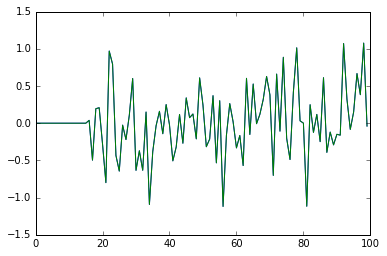

In [742]:
plot(delayr[:100])
plot(pph[:100])

In [587]:
pp.shape

(524288,)

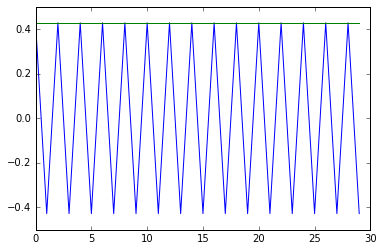

In [306]:
plot(noncontig[:30,10])
plot(contig[:30,10])

In [273]:
1025*4

4100

In [234]:
del packets[4]

In [235]:
%timeit ob = sd.decode_and_demodulate_packets(packets,assume_not_contiguous=False)

skipped 2 packets
skipped 2 packets
skipped 2 packets
skipped 2 packets
1 loop, best of 3: 211 ms per loop


In [233]:
len(packets)

16385

In [232]:
sd.sequence_number_increment_per_packet

16384

In [227]:
((2**14*4096))/.131

512281404.58015263

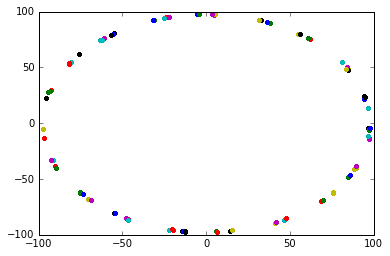

In [257]:
plot_ri(ob[:,::8],'.')

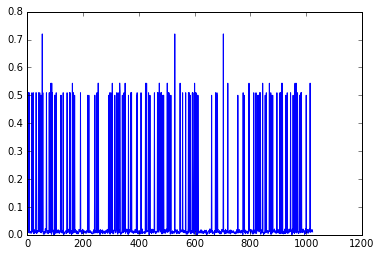

In [271]:
plot(ob.std(0))

In [215]:
ob.shape

(16385, 1024)

In [51]:
data,s,bad,dropped=r2_udp_catcher.decode_packets(packets,512)

In [54]:
data.shape

(32768, 512)

In [55]:
s.shape

(16384,)

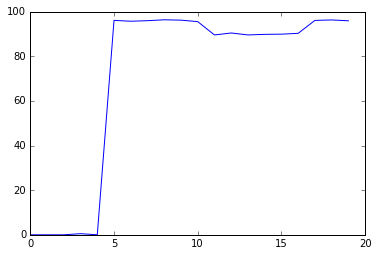

In [64]:
plot(data.std(0)[:20])

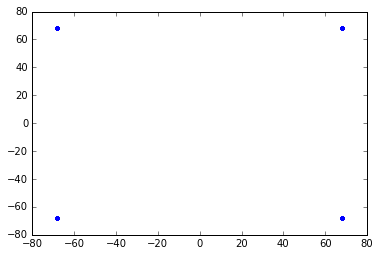

In [68]:
plot_ri(data[:,20],'.')

In [69]:
import scipy.signal

In [71]:
scipy.signal.get_window?

In [74]:
import types

In [75]:
type(scipy.signal.flattop) is types.FunctionType

True

In [92]:
scipy.signal.flattop(16)

array([ 0.001     , -0.00490476, -0.0309431 , -0.06817266, -0.03246936,
        0.1975    ,  0.60667266,  0.94881722,  0.94881722,  0.60667266,
        0.1975    , -0.03246936, -0.06817266, -0.0309431 , -0.00490476,
        0.001     ])

In [155]:
ri.state

StateDict({'boffile': 'r2iq2xpfb14mcr18gb_2016_Jun_30_1104.bof', 'modulation_output': 0, 'modulation_rate': 0, 'fft_shift_register': 1048512, 'num_tone_samples': 65536, 'bank': 0, 'num_filterbank_channels': 16384, 'loopback': True, 'lo_frequency': 0.0, 'adc_sample_rate': 512000000.0, 'waveform_normalization': 0.001068115234375, 'hardware_delay_samples': -16025.6, 'num_tones': 512, 'debug_register': 0, 'dac_attenuation': nan, 'heterodyne': True})

In [158]:
ri.active_state_arrays.keys()

['filterbank_bin', 'tone_amplitude', 'tone_phase', 'tone_index', 'tone_bin']

In [159]:
ri.active_state_arrays['tone_amplitude']

array(1.0)

In [161]:
x = np.arange(1024,dtype='uint32')

In [169]:
%timeit np.all(np.ediff1d(x)==1)

The slowest run took 7.98 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 13.4 µs per loop


In [171]:
np.diff??

In [163]:
np.diff(x).dtype

dtype('uint32')

In [157]:
[x.shape for x in ri.active_state_arrays.values()]

[(512,), (), (512,), (512,), (512,)]

In [91]:
scipy.signal.get_window('flattop',16,fftbins=False)

array([ 0.001     , -0.00490476, -0.0309431 , -0.06817266, -0.03246936,
        0.1975    ,  0.60667266,  0.94881722,  0.94881722,  0.60667266,
        0.1975    , -0.03246936, -0.06817266, -0.0309431 , -0.00490476,
        0.001     ])

In [96]:
scipy.signal.flattop??

In [145]:
coeffs=scipy.io.loadmat('/home/gjones/kid_readout/kid_readout/roach/flattopwin_2_14.mat',squeeze_me=True)['coeffs'
]

In [129]:
rawmatlab = scipy.io.loadmat('/home/readout/readout_fpga/r2mdls/heterodyne/raw_flattopwin.mat',squeeze_me=True)['rawflattop']

In [130]:
spwin = scipy.signal.flattop(2*2**14)

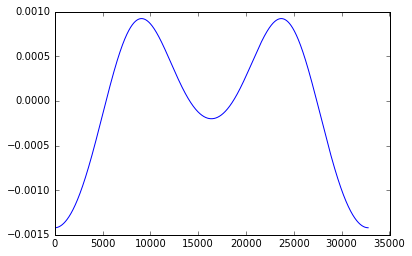

In [133]:
#plot(spwin)
plot(rawmatlab-spwin)

In [134]:
np.sinc?

In [139]:
dem = demodulator.Demodulator()

In [140]:
spwin = dem.compute_pfb_window()

In [124]:
spwin[0]

3.8981718325195821e-20

In [146]:
mlf,mlr = dem.compute_window_frequency_response(coeffs)

In [141]:
spf,spr = dem.compute_window_frequency_response(spwin)

(-10, 10)

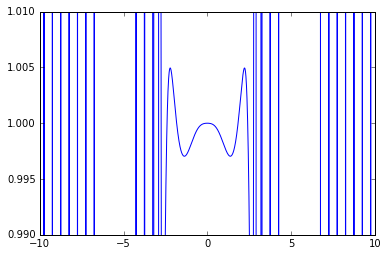

In [154]:
plot(mlf,mlr/spr)
ylim(.99,1.01)
#plot(spf,spr)
xlim(-10,10)


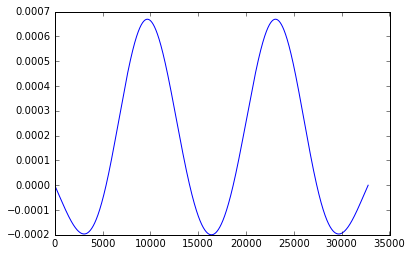

In [149]:
plot(coeffs-spwin)
#plot(spwin)

In [97]:
import scipy.io

In [99]:
ri.boffile

'r2iq2xpfb14mcr18gb_2016_Jun_30_1104.bof'

In [98]:
scipy.io.loadmat?

In [43]:
2**28

268435456

In [14]:
gold_data.shape

(31252, 256)

In [46]:
stream_demod.hardware_delay_samples

-16025.6

In [47]:
stream_demod.hardware_delay_samples = 0

In [7]:
dwave,period = stream_demod.create_demodulation_waveform(raw_data.shape,raw_seqno-ri.phase0)

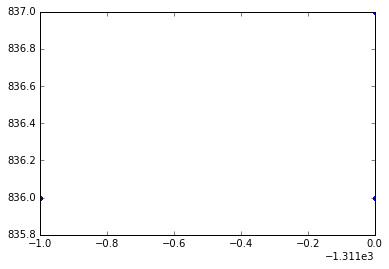

In [208]:
plot_ri(raw_data[:,1],'.')

In [8]:
err = np.abs(gold_data - demod_data).max(0)

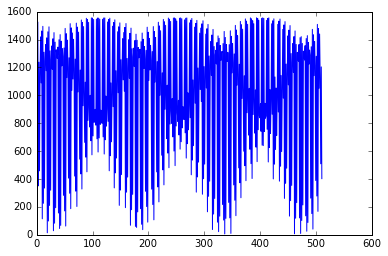

In [9]:
plot(np.abs(demod_data.real).max(0))

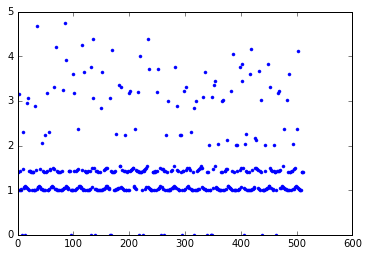

In [10]:
plot(err,'.')

In [165]:
err[:10]

array([ 1.00000991,  1.00107407,  1.00988204,  1.01801465,  1.04404304,
        1.06288534,  1.06285105,  1.47645409,  1.01809636,  1.42821368])

In [166]:
err.argmax()

152

In [144]:
err[235]

8.5119852354356091e-05

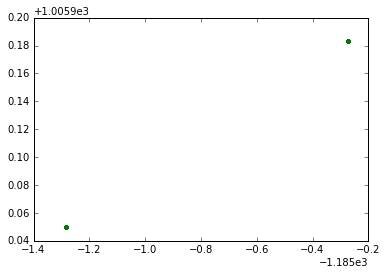

In [11]:
plot_ri(gold_data[:,153],'.')
plot_ri(demod_data[:,153],'.')

/home/gjones/miniconda2/envs/readout/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


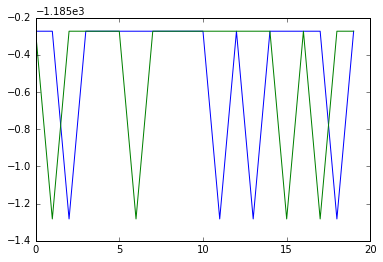

In [12]:
plot(gold_data[:20,153])
plot(demod_data[:20,153])


In [205]:
dwave.dtype

dtype('complex128')

In [95]:
raw_data.dtype

dtype('complex64')

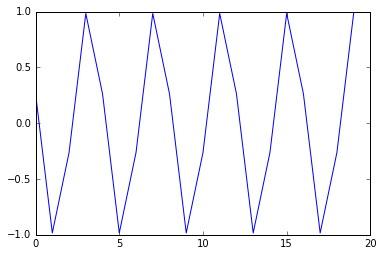

In [172]:
#plot(raw_data[:20,153].real)
plot(dwave.real[:20,3])

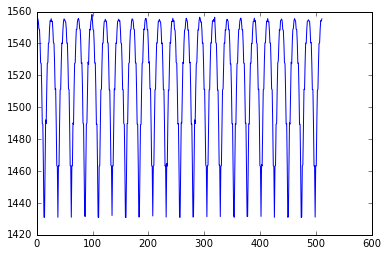

In [13]:
plot(np.abs(raw_data).max(0))

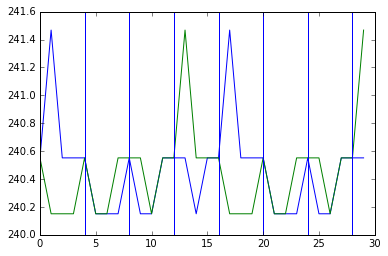

In [14]:
plot(dwave[:30,1]*raw_data[:30,1])
plot(gold_data[:30,1])
for k in range(8):
    axvline(k*4)

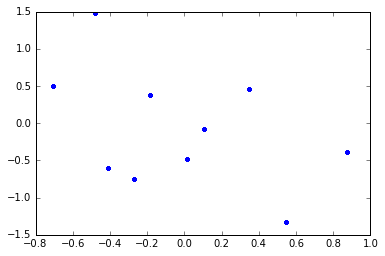

In [151]:
plot_ri(gold_data[1:,1]-demod_data[:-1,1],'.')
#plot_ri(demod_data[:,1],'.')

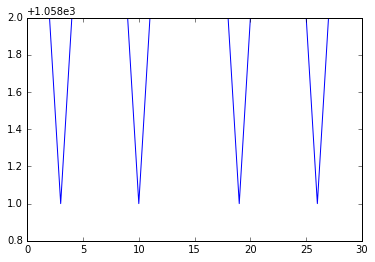

In [152]:
plot(raw_data[:30,0].imag)

In [39]:
from kid_readout.roach.calculate import packet_phase, tone_offset_frequency, get_offset_frequencies_period

In [242]:
from kid_readout.roach import calculate
reload(calculate)

<module 'kid_readout.roach.calculate' from '/home/gjones/kid_readout/kid_readout/roach/calculate.py'>

In [243]:
offset_freq = tone_offset_frequency(stream_demod.tone_bins,stream_demod.tone_nsamp,stream_demod.fft_bins,stream_demod.nfft)

In [244]:
pph = calculate.packet_phase((raw_seqno-ri.phase0)[0],offset_freq,512,16,2**14)

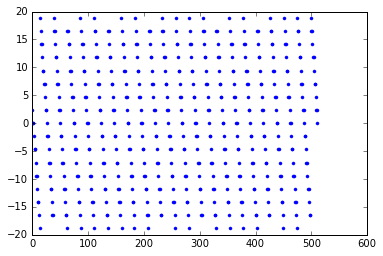

In [245]:
plot(pph,'.')

In [213]:
offset_freq[153]

0.25

In [214]:
get_offset_frequencies_period(offset_freq)

16

In [217]:
pphase = packet_phase((raw_seqno-ri.phase0)[0],offset_freq,stream_demod.num_channels,stream_demod.nfft,stream_demod.tone_nsamp)

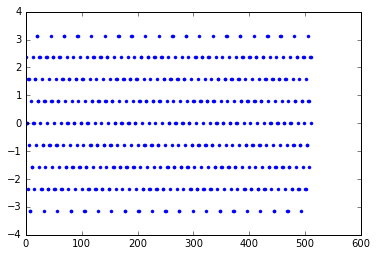

In [246]:
plot(np.angle(pphase),'.')

In [223]:
stream_demod.num_channels

512

In [227]:
2**18/(1024*2**13 / 512)

16

In [228]:
2**18/2**14

16

In [229]:
ri.blocks_per_second

15625.0

In [230]:
offset_freq[:10]

array([-0.0625,  0.    ,  0.    ,  0.0625,  0.125 ,  0.125 ,  0.1875,
        0.25  ,  0.25  ,  0.3125])

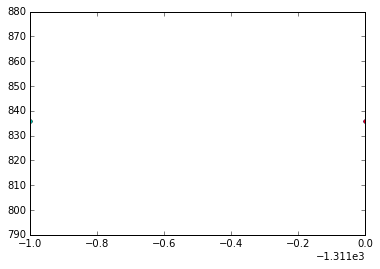

In [249]:
for k in range(32):
    d,sno = ri.get_data(2048,demod=False)
    #ppha = (packet_phase(sno[0]-ri.phase0,offset_freq,512,2**14,2**18)[0])
    ppha = np.exp(1j*calculate.packet_phase((sno[0]-ri.phase0),offset_freq,512,16,2**14))
    plot_ri(d[0,1]*ppha[1],'.')
#    plot_ri(ppha*1500,'x')

In [238]:
raw_seqno.dtype

dtype('uint32')

In [239]:
raw_seqno-ri.phase0

array([686735360, 686751744, 686768128, ..., 942686208, 942702592,
       942718976], dtype=uint32)

In [221]:
np.diff(raw_seqno[:10])

array([16384, 16384, 16384, 16384, 16384, 16384, 16384, 16384, 16384], dtype=uint32)

In [240]:
1024//512

2

In [186]:
wc = stream_demod.compute_pfb_response(offset_freq)